## All purpose loan calculator
It calculates amortized loan schedule with principals and interests. It also lists breakdown of the payment schedule when additive payment is paid.

In [5]:
import pandas as pd

In [39]:
LOAN_AMT = 50000
LOAN_TERM = 60 #in month
APR = 0.1510 #in percentage

In [96]:
def calculate_interest(P,r):
    '''Calculate simple monthly interest payment
    '''
    
    return P*r/12
    
def calculate_snapshot_monthly(P, r, n):
    '''Calculate amortized monthly payment
    
    P (int): initial principal
    r (float): interest per period (e.g., APR/12)
    n (int): total number of payments
    '''
    r /= 12 #interest per month
    A = P / ( (1+r)**n-1 ) * (r*(1+r)**n)
    
    return A

def find_optimal_schedule(P,r,n,test_range):
    cols = ['Additive Down', 'Total Payment Schedule', 'Total Interest Paid']
    df = pd.DataFrame(columns=cols)
    
    for rng in test_range:
        total_schedule, total_interest = generate_amortization_table(P=P, r=r, n=n, additive=rng, return_range=True)
        df = pd.concat([df, pd.DataFrame([rng, total_schedule, total_interest], index=cols).T])
    
    df.reset_index(drop=True, inplace=True)
    return df

def generate_amortization_table(P,r,n,additive=0,return_range=False):
    '''Generate complete amortization schedule
    
    P (int): initial principal
    r (float): interest per period (e.g., APR/12)
    n (int): total number of payments
    additive (float): additional monthly principal payment
    '''
    cols = ['Beginning Balance', 'Total Pmt', 'Interest', 'Principal', 'Ending Balance', 'Total Interest']
    df = pd.DataFrame(columns=cols)
    M = calculate_snapshot_monthly(P=P, r=r, n=n)+additive #monthly total (this is constant)
    TI = 0
    
    for i in range(n):
        I = calculate_interest(P=P, r=r)
        TI += I
        P_i = P #initial balance
        pr = M-I #principal
        P -= pr #ending balance

        if P < 0: 
            M = P_i
            pr = M
            P = 0

        tmp = [P_i, M, I, pr, P, TI]
        tmp = [round(j,2) for j in tmp]
        
        df = pd.concat([df, pd.DataFrame(tmp, index=cols).T])

        if P == 0: #break cycle if ends early
            break

    df = df.reset_index(drop=True)
    df.index += 1
    if return_range:
        return max(df.index), TI
    else:
        return df

In [42]:
df = find_optimal_schedule(P=LOAN_AMT, r=APR, n=LOAN_TERM, test_range=range(0, 3000, 50))

In [43]:
df

,Additive Down,Total Payment Schedule,Total Interest Paid
0,0.0,60.0,21527.360638
1,50.0,57.0,20158.176087
2,100.0,54.0,18957.367713
3,150.0,51.0,17896.702998
4,200.0,49.0,16950.997907
5,250.0,46.0,16105.057509
6,300.0,44.0,15342.21209
7,350.0,42.0,14649.595645
8,400.0,41.0,14020.501605
9,450.0,39.0,13444.890773


c:\ProgramData\Anaconda3\envs\main\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


<AxesSubplot:xlabel='Additive Down'>

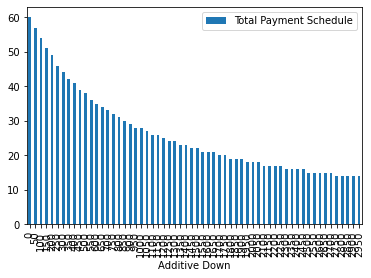

In [31]:
df.plot(x='Additive Down', y='Total Payment Schedule', kind='bar')

In [58]:
generate_amortization_table(P=LOAN_AMT, r=APR, n=LOAN_TERM, additive=100)#.Principal.sum()

,Beginning Balance,Total Pmt,Interest,Principal,Ending Balance,Total Interest
1,50000.0,1192.12,629.17,562.96,49337.04,629.17
2,49337.04,1192.12,620.82,571.3,48665.75,1249.99
3,48665.75,1192.12,612.38,579.75,47986.0,1862.37
4,47986.0,1192.12,603.82,588.3,47297.7,2466.19
5,47297.7,1192.12,595.16,596.96,46600.74,3061.36
6,46600.74,1192.12,586.39,605.73,45895.01,3647.75
7,45895.01,1192.12,577.51,614.61,45180.4,4225.26
8,45180.4,1192.12,568.52,623.6,44456.8,4793.78
9,44456.8,1192.12,559.41,632.71,43724.09,5353.19
10,43724.09,1192.12,550.19,641.93,42982.16,5903.39


#### END OF THE NOTEBOOK